In [0]:
#all imports
import tensorflow as tf
import torch

In [0]:

gpuname=tf.test.gpu_device_name()
if gpuname=='/device:GPU:0':
  print('Found GPU at :{}'.format(gpuname))
else:
  raise(SystemError('GPU device not found'))

Found GPU at :/device:GPU:0


In [0]:
if torch.cuda.is_available():
  device=torch.device("cuda")
  print("There are %d GPU DEVICES available " %torch.cuda.device_count())
  print("The device name is %s"%torch.cuda.get_device_name(0))
else:
  print("No GPU available using only CPU instead")
  device=torch.device("cpu")



There are 1 GPU DEVICES available 
The device name is Tesla P100-PCIE-16GB


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!unzip -P yourpassword -qq '/content/drive/My Drive/GreekData/Greek.zip'
!unzip -P yourpassword -qq '/content/drive/My Drive/GreekData/offenseval2020-test-greek.zip'

In [0]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
import torch

import random
import numpy as np

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [0]:
!pip install transformers

     |████████████████████████████████| 573kB 8.9MB/s 
     |████████████████████████████████| 1.0MB 61.8MB/s 
     |████████████████████████████████| 890kB 56.9MB/s 
     |████████████████████████████████| 3.7MB 52.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=4a2b1074a524ec51dbccdd30556c2a1ffac98d1c2eae435414f9a1b269e6d9c0
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sacremoses


In [0]:
from transformers import BertTokenizer

tokenizer=BertTokenizer.from_pretrained('bert-base-multilingual-cased',do_lower_case=True)

In [0]:
init_token = tokenizer.cls_token
eos_token = tokenizer.sep_token
pad_token = tokenizer.pad_token
unk_token = tokenizer.unk_token

print(init_token, eos_token, pad_token, unk_token)

[CLS] [SEP] [PAD] [UNK]


In [0]:
init_token_idx = tokenizer.convert_tokens_to_ids(init_token)
eos_token_idx = tokenizer.convert_tokens_to_ids(eos_token)
pad_token_idx = tokenizer.convert_tokens_to_ids(pad_token)
unk_token_idx = tokenizer.convert_tokens_to_ids(unk_token)

print(init_token_idx, eos_token_idx, pad_token_idx, unk_token_idx)

101 102 0 100


...or by explicitly getting them from the tokenizer.

In [0]:
init_token_idx = tokenizer.cls_token_id
eos_token_idx = tokenizer.sep_token_id
pad_token_idx = tokenizer.pad_token_id
unk_token_idx = tokenizer.unk_token_id

print(init_token_idx, eos_token_idx, pad_token_idx, unk_token_idx)

101 102 0 100


In [0]:
max_input_length = tokenizer.max_model_input_sizes['bert-base-multilingual-cased']

print(max_input_length)

512


In [0]:
pip install emoji --upgrade

     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=8697ca35d6bb44c678b6266942c15870f9446e24a11c0a4cd5fee366603e687b
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [0]:
import spacy.cli
spacy.cli.download("el_core_news_md")


✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [0]:
#LEMMATIZATION
import string
import spacy
#import el_core_news_sm 
from spacy.tokenizer import Tokenizer
import re
import emoji

nlp =  spacy.load('el_core_news_md')


In [0]:
def tokenize_and_cut(sentence):
    s=""
    txt1=emoji.demojize(sentence)
    x1=nlp(txt1)
    #print(x1)
    x2=[]
    for t in x1:
        z=str(t)
        if z not in string.punctuation  and t.is_stop==False:
          x2.append(z)
    s+=' '.join(x2)
    #print(s)  
    tokens = tokenizer.tokenize(s) 
    tokens = tokens[:max_input_length-2]
    return tokens

In [0]:
tokenize_and_cut("@USER Οι μουσουλμάνες που τις βιάζουν έτσι κ αλλιώς, οπότε τις βολεύει να κυνηγούν εμάς κ να αφήσουν αυτές ήσυχες οι άντρες τους.")

['@',
 'user',
 'μου',
 '##σου',
 '##λ',
 '##μαν',
 '##ες',
 'β',
 '##ια',
 '##ζουν',
 'κ',
 'β',
 '##ο',
 '##λε',
 '##υ',
 '##ει',
 'κ',
 '##υ',
 '##νη',
 '##γου',
 '##ν',
 'κ',
 'α',
 '##φη',
 '##σουν',
 'η',
 '##σ',
 '##υ',
 '##χε',
 '##ς',
 'αν',
 '##τ',
 '##ρες']

In [0]:
from torchtext import data

TEXT = data.Field(batch_first = True,
                  use_vocab = False,
                  tokenize = tokenize_and_cut,
                  preprocessing = tokenizer.convert_tokens_to_ids,
                  init_token = init_token_idx,
                  eos_token = eos_token_idx,
                  pad_token = pad_token_idx,
                  unk_token = unk_token_idx)


LABEL = data.LabelField(dtype = torch.float)

#TIDS=data.Field(use_vocab=False, batch_first=True)

In [0]:
#GET THE DATA FROM THE PANDAS FRAME
headers=['id','tweet','subtask_a']
greekdata = pd.read_csv("Greek/offenseval-greek-training-v1.tsv", delimiter='\t',names=headers)
data=greekdata[1:]


In [0]:
greektrain,greektest= train_test_split(greekdata, test_size=0.2, random_state=42)
export_csv = greektrain.to_csv ('Greek/TrainFilegreek.csv', index = None, header=True)
print (greektrain.head())
export_csv = greektest.to_csv ('Greek/TestFilegreek.csv', index = None, header=True)
print (greektest.head())


        id                                              tweet subtask_a
2002  4347  @USER Μη με κουρδίζεις νυχτιάτικα, βαλτός είσα...       NOT
4645  4175                         Ωραιο μουνι, ποδοσφαιρικο.       OFF
1916  1439  @USER 1. Αποκλείστηκες διότι με έβαλες σε ομάδ...       NOT
1550  6404                 Κόψτε τους τα μανιτάρια #XFactorGR       NOT
2358  5730  Σακης... Χριστινακι μου γλυκο! στα καπακια εισ...       NOT
        id                                              tweet subtask_a
4538  2263  @USER Mπλοκ το Μαράκι, δεν της άρεσε η λύση πο...       NOT
7353  1055  @USER αδελφέ, δεν ξέρω τι ακριβώς έγινε.. απλά...       NOT
3181  7142  Τα γαλλικά, ήταν η γλώσσα της Αριστοκρατίας τό...       NOT
1626  3768  @USER Ρε Κουλη σε ξέρουμε επειδή φαίνεσαι και ...       NOT
7634  5698  Από το πρωί είμαι με ένα «τι κοιτάς ρε μαλακισ...       OFF


In [0]:
ygiven=[]
ypredicted=[]

def convertToInt(val):
    if not val:
        return 0    
    try:
        return np.int64(val)
    except:        
        return np.int64(0)



In [0]:
##GOLD LABELS FOR GREEK TAKEN 
#from here https://sites.google.com/site/offensevalsharedtask/results-and-paper-submission
#OFFENSEVALGOLDLABELS.zip

In [ ]:
headers=['id','ypredicted']
greekdataBaseline = pd.read_csv("/content/drive/My Drive/OffensEvalGoldLabels/greek-goldlabels.csv", delimiter=',',names=headers)
#,converters={"id":convertToInt}       
greekdataBaseline.id = greekdataBaseline.id.astype(int)
#greekdataBaseline=greekdataBaseline[1:]
#print(greekdataBaseline.dtypes)
headers=['id','tweet']
greekDataTest = pd.read_csv("testset_taska.tsv", delimiter='\t',names=headers,
                              converters={"id":convertToInt})
greekDataTest=greekDataTest[1:]
#print(greekDataTest.head())
#print(greekDataTest.dtypes)
print(greekDataTest.shape)
result = pd.merge(greekDataTest, greekdataBaseline, on='id', how='inner')
print(result.head())
print(result.dtypes)
print(result.shape)
#result=
#result.sort_values(by=['id'], inplace=True)
print(result.head())
dfnumpy=result.to_numpy();
X=dfnumpy[:, 1].reshape(-1, 1)
y=dfnumpy[:, 2].reshape(-1, 1)
tid=dfnumpy[:, 0].reshape(-1, 1)
#print(tid)
#arrt=X[:,0]
#preprocessedTweets=arrt

In [ ]:
export_csv = result.to_csv ('Greek/PredictFilegreek.csv', index = None, header=True)
print (result.head())

In [0]:
from torchtext import datasets
from torchtext import data

train_val_fields = [
    ('id', None), # we dont need this, so no processing
    ('tweet', TEXT), # process it as label
    ('subtask_a', LABEL) # we dont need this, so no processing
]

train_data, valid_data = data.TabularDataset.splits(path='Greek/', 
                                            format='csv', 
                                            train='TrainFilegreek.csv', 
                                            validation='TestFilegreek.csv',
                                            fields=train_val_fields, 
                                            skip_header=True)

In [0]:

test_val_fields = [
    ('id', None), # we dont need this, so no processing
    ('tweet', TEXT), # process it as label
    ('y_predicted', LABEL) # we dont need this, so no processing
]
predict_data = data.TabularDataset(path='Greek/PredictFilegreek.csv', format='csv', skip_header=True,fields=test_val_fields)

In [0]:
print(f"Number of training examples: {len(train_data)}")
print(f"Number of validation examples: {len(valid_data)}")
print(f"Number of prediction examples: {len(predict_data)}")

Number of training examples: 6995
Number of validation examples: 1749
Number of prediction examples: 1544


In [0]:
print(vars(train_data.examples[6]))

{'tweet': [466, 97317, 33617, 31796, 13140, 70887, 43202, 31821, 483, 29223, 14669, 35670, 45878, 27393, 465, 24767, 469, 17198, 30645, 64472, 27621, 22013, 70279, 53166, 487, 13140, 63444, 61399, 61399, 22013, 70279, 53166, 168, 28174, 12961, 38278], 'subtask_a': 'NOT'}


In [0]:
tokens = tokenizer.convert_ids_to_tokens(vars(train_data.examples[6])['tweet'])

print(tokens)

['β', '##γη', '##κε', 'αν', '##α', '##κο', '##ιν', '##ωση', 'σ', '##π', '##υ', '##ρι', '##δου', '##λα', 'α', '##κα', 'ε', '##λ', '##λη', '##νι', '##δα', 'master', '##chef', '##gr', 'χ', '##α', '##χ', '##χα', '##χα', 'master', '##chef', '##gr', '_', 'xe', '##ft', '##iles']


In [0]:
LABEL.build_vocab(train_data)

In [0]:
print(LABEL.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7f33d3dfc9d8>, {'NOT': 0, 'OFF': 1})


In [0]:
BATCH_SIZE = 32

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator = data.BucketIterator.splits(
    (train_data, valid_data), 
    batch_size = BATCH_SIZE, 
    sort=False,
    device = device)

In [0]:
from transformers import BertTokenizer, BertModel
from transformers import BertConfig

In [0]:
config1=BertConfig.from_pretrained('bert-base-multilingual-cased',output_hidden_states=True)


In [0]:
bert =BertModel.from_pretrained('bert-base-multilingual-cased',config=config1)


In [0]:
#concatenating the hidden layers in pytorch adapted and inspired from:
#https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/#32-understanding-the-output

In [0]:
import torch.nn as nn
from transformers import BertConfig
class BERTGRUSentiment(nn.Module):
    def __init__(self,
                 bert,
                 hidden_dim,
                 output_dim,
                 n_layers,
                 bidirectional,
                 dropout):
        
        super().__init__()
        
        self.bert = bert
        
        
        embedding_dim = bert.config.to_dict()['hidden_size']*4
        
        self.rnn = nn.GRU(embedding_dim,
                          hidden_dim,
                          num_layers = n_layers,
                          bidirectional = bidirectional,
                          batch_first = True,
                          dropout = 0 if n_layers < 2 else dropout)
        
        self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        xmask=[]
        #text = [batch size, sent len]
        for b in text:
            attention_mask = [int(i > 0) for i in b] 
            att=torch.tensor(attention_mask)
            xmask.append(att)

        x_att_mask_pytorch=torch.stack(xmask).to(device)

        with torch.no_grad():
            embedded= self.bert(text,attention_mask=x_att_mask_pytorch)
        hidden=embedded[-1]
        #print(hidden[12].size())
        #print(embedded[0].size())
        #print(len(hidden))
        '''
        encoded_layers=hidden
        print ("Number of layers:", len(encoded_layers))
        layer_i = 0

        print ("Number of batches:", len(encoded_layers[layer_i]))
        batch_i = 0

        print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
        token_i = 0

        print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))
        '''
        
        token_embeddings=torch.stack(hidden, dim=0)
        #print(token_embeddings.size())
        token_embeddings = torch.squeeze(token_embeddings, dim=1)
        #print(token_embeddings.size())
        token_embeddings = token_embeddings.permute(1,2,0,3)
        #print(token_embeddings.size())
        token_vecs_cat = []
        irnn=[]
        for b in token_embeddings:
          token_vecs_cat = []
          for token in b:
           cat_vec = torch.cat((token[-1],token[-2], token[-3], token[-4]), dim=0)
           #print("cat_vec",len(cat_vec))
           token_vecs_cat.append(cat_vec)
           #a=torch.Tensor(token_vecs_cat)
           #print(len(token_vecs_cat))
          a = torch.stack(token_vecs_cat)#.to(device)
          irnn.append(a) 
        z=torch.stack(irnn)#.to(device)
        '''print(z.size())
        print ('Shape is: %d x %d x %d' % (len(z), len(z[0]),len(z[1])))
        print(type(z))
        print(type(z[0]))
        print(type(z[1]))
        '''
        _, hidden = self.rnn(z)
        
        #hidden = [n layers * n directions, batch size, emb dim]
        
        if self.rnn.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])
                
        #hidden = [batch size, hid dim]
        
        output = self.out(hidden)
        
        #output = [batch size, out dim]
        
        return output

In [0]:
HIDDEN_DIM = 512
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.25

model = BERTGRUSentiment(bert,
                         HIDDEN_DIM,
                         OUTPUT_DIM,
                         N_LAYERS,
                         BIDIRECTIONAL,
                         DROPOUT)

In [0]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 193,595,393 trainable parameters


In [0]:
for name, param in model.named_parameters():                
    if name.startswith('bert'):
        param.requires_grad = False

In [0]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 15,741,953 trainable parameters


In [0]:
for name, param in model.named_parameters():                
    if param.requires_grad:
        print(name)

rnn.weight_ih_l0
rnn.weight_hh_l0
rnn.bias_ih_l0
rnn.bias_hh_l0
rnn.weight_ih_l0_reverse
rnn.weight_hh_l0_reverse
rnn.bias_ih_l0_reverse
rnn.bias_hh_l0_reverse
rnn.weight_ih_l1
rnn.weight_hh_l1
rnn.bias_ih_l1
rnn.bias_hh_l1
rnn.weight_ih_l1_reverse
rnn.weight_hh_l1_reverse
rnn.bias_ih_l1_reverse
rnn.bias_hh_l1_reverse
out.weight
out.bias


In [0]:
import torch.optim as optim
from transformers import AdamW

optimizer = optim.Adam(model.parameters())

In [0]:
criterion = nn.BCEWithLogitsLoss()

In [0]:
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
model

In [0]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [0]:
##F1 score calculator for each batch below using sklearn

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
def binary_accuracy2(preds, y):
    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    #print("Predicted",rounded_preds)
    #print("labelsFlattend",y)
    return f1_score(y.detach().cpu().numpy(), rounded_preds.detach().cpu().numpy(), average='macro'),acc

In [0]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        #print(batch)
        optimizer.zero_grad()
        
        predictions = model(batch.tweet).squeeze(1)
        #print(predictions.dtype)
            
        loss = criterion(predictions, batch.subtask_a)
        #print( batch.subtask_a.dtype)
            
        acc = binary_accuracy(predictions, batch.subtask_a)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
kmax=0
ktemp=0

In [0]:
def evaluate(model, iterator, criterion):
    kmax=0
    epoch_loss = 0
    epoch_acc = 0
    nb_eval_steps=0
    eval_acc=0
    eval_f1=0
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.tweet).squeeze(1)
            loss = criterion(predictions, batch.subtask_a)
            tmpf1score,acc = binary_accuracy2(predictions, batch.subtask_a)
            eval_f1 = eval_f1+tmpf1score
            eval_acc=eval_acc+acc
            nb_eval_steps += 1
            epoch_loss += loss.item()
            epoch_acc += acc.item()

    ktemp=eval_f1/nb_eval_steps
    #if ktemp>kmax:
    #  kmax=ktemp
    #  print("SAVING MODEL for F1 score of ",ktemp )
    #  torch.save({'state_dict': model.state_dict()},'/content/drive/My Drive/GreekData/bertlstm.pth.tar')
    f1=eval_f1/nb_eval_steps
    print("  F1 score: {0:.3f}".format(f1))
    print("  Accuracy score: {0:.3f}".format(eval_acc/nb_eval_steps))
    return epoch_loss / len(iterator), epoch_acc / len(iterator),f1

In [0]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [0]:
N_EPOCHS = 10

best_f1=0

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    #print("STOP")
    valid_loss, valid_acc,f1 = evaluate(model, valid_iterator, criterion)
        
    end_time = time.time()    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if f1 > best_f1:
        best_f1 = f1
        torch.save({'state_dict': model.state_dict()}, '/content/drive/My Drive/GreekData/berthiddengru.pth.tar')
        print("SAVING MODEL after ")
        print("Epoch Number ",epoch)
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

  F1 score: 0.665
  Accuracy score: 0.783
SAVING MODEL after 
Epoch Number  0
Epoch: 01 | Epoch Time: 1m 44s
	Train Loss: 0.596 | Train Acc: 71.26%
	 Val. Loss: 0.483 |  Val. Acc: 78.32%
  F1 score: 0.734
  Accuracy score: 0.821
SAVING MODEL after 
Epoch Number  1
Epoch: 02 | Epoch Time: 1m 44s
	Train Loss: 0.501 | Train Acc: 77.27%
	 Val. Loss: 0.425 |  Val. Acc: 82.13%
  F1 score: 0.704
  Accuracy score: 0.823
Epoch: 03 | Epoch Time: 1m 44s
	Train Loss: 0.466 | Train Acc: 79.44%
	 Val. Loss: 0.422 |  Val. Acc: 82.33%
  F1 score: 0.754
  Accuracy score: 0.841
SAVING MODEL after 
Epoch Number  3
Epoch: 04 | Epoch Time: 1m 44s
	Train Loss: 0.445 | Train Acc: 80.62%
	 Val. Loss: 0.390 |  Val. Acc: 84.15%
  F1 score: 0.773
  Accuracy score: 0.833
SAVING MODEL after 
Epoch Number  4
Epoch: 05 | Epoch Time: 1m 44s
	Train Loss: 0.432 | Train Acc: 81.65%
	 Val. Loss: 0.401 |  Val. Acc: 83.29%
  F1 score: 0.781
  Accuracy score: 0.847
SAVING MODEL after 
Epoch Number  5
Epoch: 06 | Epoch Time:

In [0]:
TESTING BELOW ON GOLD LABELS

NameError: ignored

In [0]:
BATCH_SIZE = 32

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

prediction_iterator = data.BucketIterator(
    predict_data,
    batch_size = BATCH_SIZE, 
    sort=False,
    device = device)

In [0]:
yres=[]
finalTid=[]
trueLabels=[]
predictedLabels=[]
def predict(model, iterator):
    kmax=0
    epoch_loss = 0
    epoch_acc = 0
    nb_eval_steps=0
    eval_acc=0
    eval_f1=0
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.tweet).squeeze(1)
            trueLabels.append((batch.y_predicted).detach().cpu().numpy())
            #finalTid.append(batch.id)
            
            predictedLabels.append(torch.round(torch.sigmoid(predictions)).detach().cpu().numpy())
            tmpf1score,acc= binary_accuracy2(predictions, batch.y_predicted)
            eval_f1 = eval_f1+tmpf1score
            eval_acc=eval_acc+acc
            nb_eval_steps += 1
            epoch_acc += acc.item()

    print("  F1 score: {0:.3f}".format(eval_f1/nb_eval_steps))
    print("  Accuracy score: {0:.3f}".format(eval_acc/nb_eval_steps))
    return predictedLabels,trueLabels

We'll load up the parameters that gave us the best validation loss and try these on the test set - which gives us our best results so far!

In [0]:
'''torch.save({'state_dict': model.state_dict()}, '/content/drive/My Drive/GreekData/bertgreekgruweek1.pth.tar')
'''

checkpoint = torch.load('/content/drive/My Drive/GreekData/berthiddengru.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [0]:
predictedLabels,trueLabels = predict(model, prediction_iterator)

  F1 score: 0.819
  Accuracy score: 0.894


In [0]:
finalTids=tid

In [0]:
ytid=tid.flatten().tolist()

In [0]:
yans=[predictedLabels[i].flatten().tolist() for i in range(len(predictedLabels))]
ytrue=[trueLabels[i].flatten().tolist() for i in range(len(trueLabels))]

In [0]:
from itertools import chain

yans=list(chain.from_iterable(yans))

ytrue=list(chain.from_iterable(ytrue))

#ytid=list(chain.from_iterable(ytid))

In [0]:
yans1=[round(x) for x in yans]
ytrue1=[round(x) for x in ytrue]

In [0]:
yans2=["NOT" if yans1[i]==0 else "OFF" for i in range(len(yans1))]
ytrue2=["NOT" if ytrue1[i]==0 else "OFF" for i in range(len(ytrue1))]


In [0]:
print(yans2.count("OFF"))
print(yans2.count("NOT"))

340
1204


In [0]:
print(ytrue2.count("OFF"))
print(ytrue2.count("NOT"))

242
1302


In [0]:
len(yans1)


1544

[[ 208   34]
 [ 132 1170]]


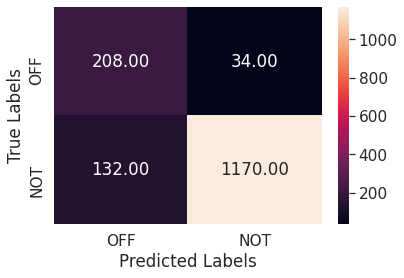

In [0]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(ytrue2, yans2, labels=['OFF', 'NOT'])
print(cnf)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt



df_cm = pd.DataFrame(cnf,['OFF', 'NOT'], ['OFF', 'NOT'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,fmt='.2f') # font size
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

In [0]:
#z={'tweet':sentence_predict[],'subtask_a':y_predict}
#print(len(z))
C = {
        'predicted': yans2,
     'given':ytrue2
    }
df = pd.DataFrame(C)

export_csv = df.to_csv ('/content/drive/My Drive/GreekData/GreekAnswerBIGRUHIDDEN512Subtaskafirst.csv', index = None, header=True)



In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/My Drive/GreekData/GreekAnswerBIGRUHIDDEN512Subtaskafirst.csv')
ypred=data['predicted'].to_numpy().tolist()
ypred=ypred[1:]
print(ypred)
print(len(ypred))
ytrue=data['given'].to_numpy().tolist()
ytrue=ytrue[1:]

print(ytrue)
print(len(ytrue))


In [0]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(ytrue, ypred, labels=['OFF', 'NOT'])
print(cnf)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt



[[ 208   33]
 [ 132 1170]]


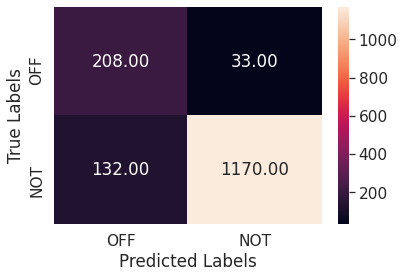

In [0]:

df_cm = pd.DataFrame(cnf,['OFF', 'NOT'], ['OFF', 'NOT'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,fmt='.2f') # font size
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()